<a href="https://colab.research.google.com/github/madhavamk/computational-data-science/blob/master/Assignments/M8_AST_06_Demand_Forecasting_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Assignment 6: Demand Forecasting

## Learning Objectives

At the end of the experiment, you will be able to :

* perform EDA and analyze the feature importance of sales data
* prepare the data for forecasting task
* solve the problem of Demand Planning Optimization
* implement ARIMA model to forecast the demands of a sales

## Information

Sales forecasting is an approach retailers use to anticipate future sales by analyzing past sales, identifying trends, and projecting data into the future. The simplest version of a sales forecast will look at sales in Store A during last year, assume a continuation of some multi-year trend for Store A (e.g. some percentage of growth or decline in sales), and project forward to predict sales in Store A this year.

Sales forecasting has been the standard approach to retailing from the beginning of the industry itself.

Although modern retailers have more data than ever (as well as new tools and business intelligence dashboards), and can easily leverage more advanced and accurate forms of forecasting, sales-based forecasting is still the backbone of most retail organizations.

some benefits of having an accurate sales forecast

* Improved decision-making about the future
* Reduction of sales pipeline and forecast risks
* Alignment of sales quotas and revenue expectations
* Reduction of time spent planning territory coverage and setting quota assignments
* Benchmarks that can be used to assess trends in the future
* Ability to focus a sales team on high-revenue, high-profit sales pipeline  opportunities, resulting in improved win rates


This Demand optimization can reduce operational costs by:

**Inventory Optimization:** matching store inventory with actual needs to reduce storage space needed (Rental Costs)

**Replenishment Optimization:** optimizing replenishment quantity per order to minimize the number of replenishments between warehouse and stores (Warehousing & Transportation Costs)


## Dataset

Store Item Demand Forecasting dataset consists of 5 years of store-item sales data from the year 2013 to 2017. It contains sales for 50 different items at 10 different stores with 913000 observations and 4 columns Date Store, item, sales.

Attributes information:

**Date:** Date starting from 2013 to 2017

**Store:** Store indicating with a number

**Item:** Item  in a store

**Sales:** No.of sales

### Setup Steps:

In [27]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "" #@param {type:"string"}

In [28]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "M8_AST_06_Demand_Forecasting_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    ipython.magic("sx pip -qq install pmdarima")
    ipython.magic("sx wget https://raw.githubusercontent.com/insaid2018/Term-3/master/Projects/Store_Item_demand_forecast.csv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://cds-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Import required packages

In [4]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
import statsmodels.api as sm
from scipy import stats
from scipy.stats import normaltest
import pmdarima as pm

### Load the data

In [5]:
dataset  =  pd.read_csv('Store_Item_demand_forecast.csv')
dataset.head(), dataset.shape

(         date  store  item  sales
 0  2013-01-01      1     1     13
 1  2013-01-02      1     1     11
 2  2013-01-03      1     1     14
 3  2013-01-04      1     1     13
 4  2013-01-05      1     1     10,
 (913000, 4))

In [6]:
def sample_set(dataset, store, item):
  return dataset[(dataset.store == store) & (dataset.item == item)].reset_index()['sales']

### ARIMA Analysis

#### Decomposition

Time series data can be broken down into four core components: the average value, a trend (i.e. an increasing mean), seasonality (i.e. a repeating cyclical pattern), and a residual (random noise). Trends and seasonality are not always present in time dependent data. The residual is what’s left over after trends and seasonality are removed. Time series models assume that the data is stationary and only the residual component satisfies the conditions for stationarity.

Python’s statsmodels library has a method for time series decomposition called `seasonal_decompose()`.

* Apply decomposition and plot the trend, seasonality and residual

To know more about `seasonal_decompose()`function click [here](https://www.statsmodels.org/devel/generated/statsmodels.tsa.seasonal.seasonal_decompose.html)

In [7]:
sample = sample_set(dataset, store = 1, item = 1)

<Figure size 640x480 with 0 Axes>

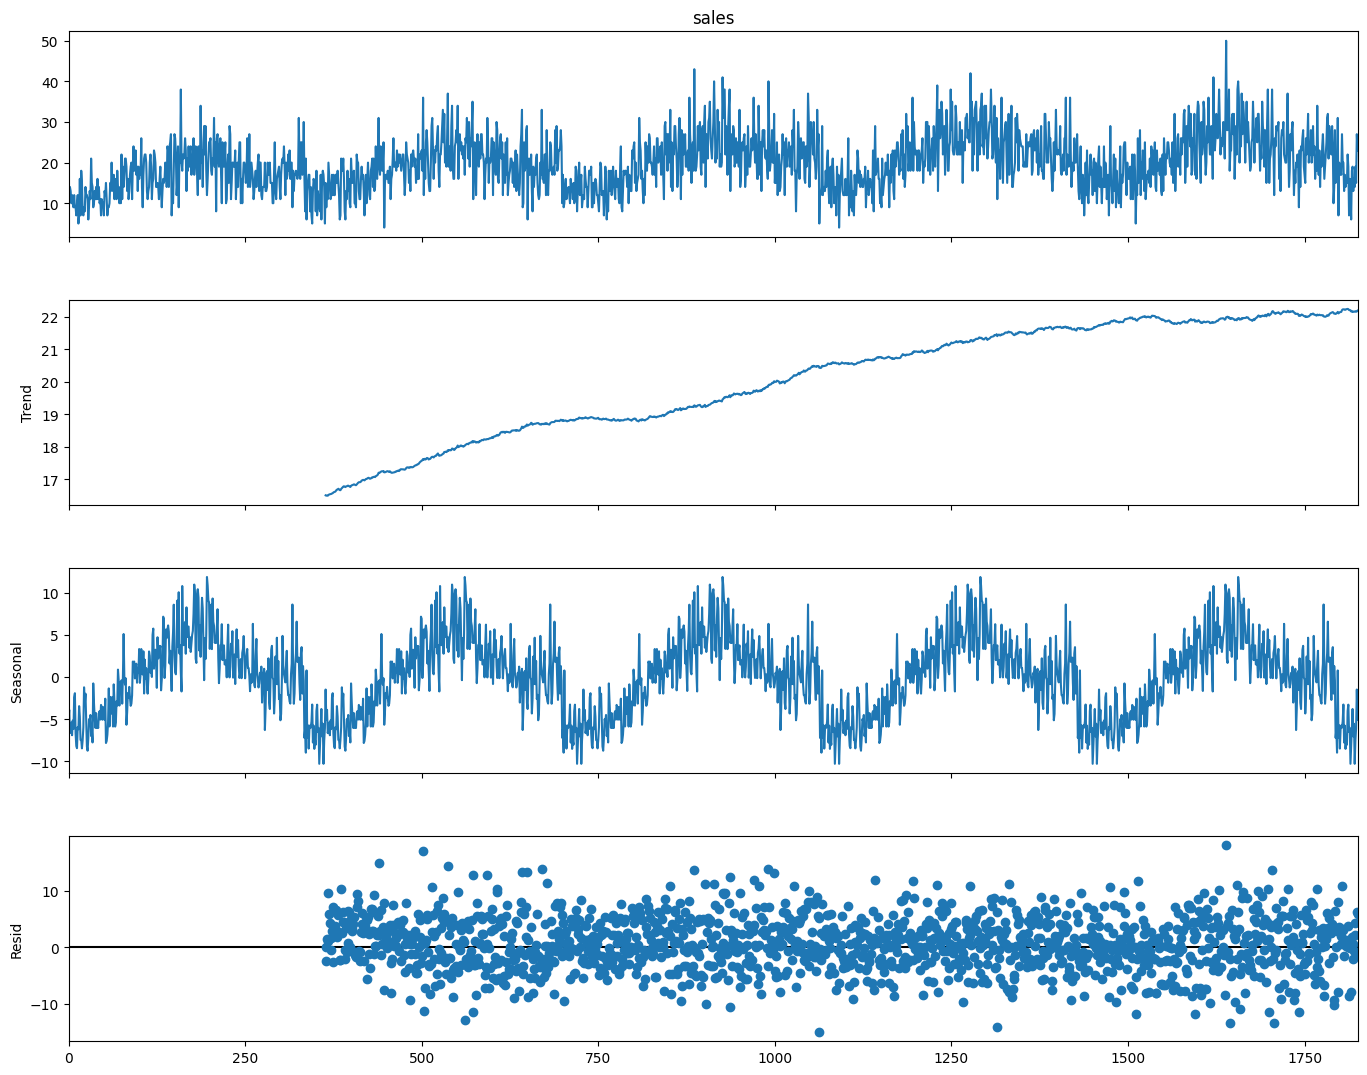

In [8]:
# Decomposition of time series
result = seasonal_decompose(x=sample, model='additive', filt=None, period=365, two_sided=False)

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 12)

#### Stationarity

If a time series is stationary and has a particular behavior over a given time interval, then it is safe to assume that it will have same behavior at some later point in time. Most statistical modeling methods assume or require the time series to be stationary.

**What is variance?**

Variance is a measurement of the spread between numbers in a data set. The variance measures how far each number in the set is from the mean. The square root of variance is the standard deviation.

**How to check Whether data is Stationary or not?**

There are two ways we can check the stationarity of a time series. The first is by looking at the data. By visualizing the data it should be easy to identify a changing mean or variation in the data. For a more accurate assessment, there are tests available such as, the Dickey-Fuller test, and  the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test. For Dickey-Fuller test, if the ‘Test Statistic’ is greater than the ‘Critical Value’ then the time series is stationary while for KPSS test, if the test statistic is greater than the critical value then the time series is not stationary.

It is always better to apply both the tests, so that it can be ensured that the series is truly stationary. Possible outcomes of applying these stationary tests are as follows:

- Case 1: Both tests conclude that the series is not stationary - The series is not stationary

- Case 2: Both tests conclude that the series is stationary - The series is stationary

- Case 3: KPSS indicates stationarity and ADF indicates non-stationarity - The series is trend stationary. Trend needs to be removed to make series strict stationary. The detrended series is checked for stationarity.

- Case 4: KPSS indicates non-stationarity and ADF indicates stationarity - The series is difference stationary. Differencing is to be used to make series stationary. The differenced series is checked for stationarity.

To know more about ADF and KPSS tests, refer [here](https://www.statsmodels.org/dev/examples/notebooks/generated/stationarity_detrending_adf_kpss.html).

Implement a function which takes a timeseries as input and perform:
  * Rolling mean and rolling standard and plot it with a graph
  * Dicky fuller test and check p-value
  * Kwiatkowski-Phillips-Schmidt-Shin test and check p-value


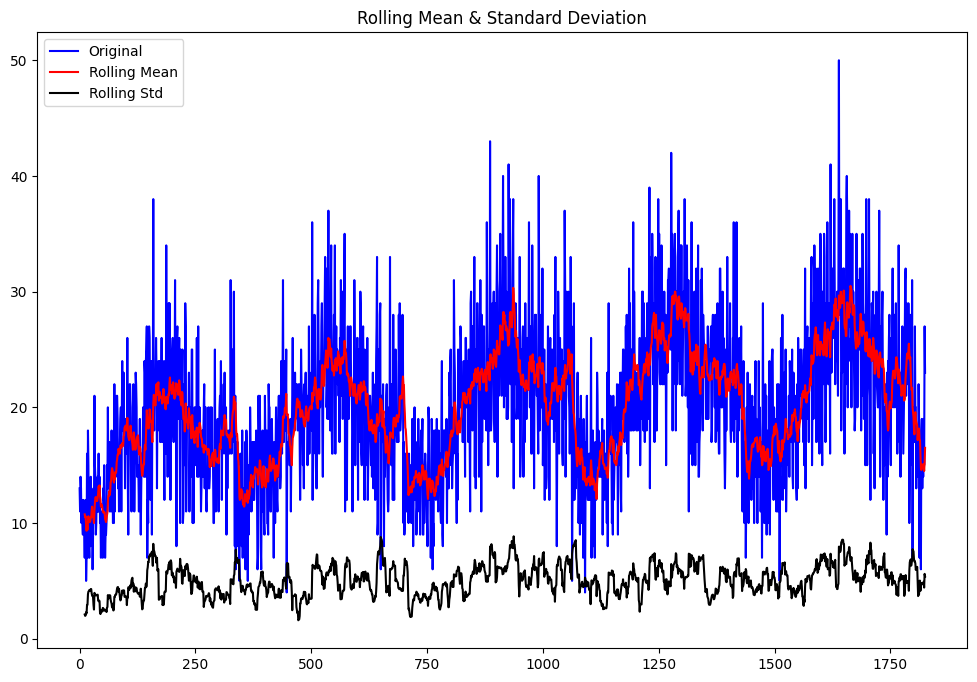

In [9]:
# Create function to test stationarity
def test_stationarity(timeseries, window = 12):

    # Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    # Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

test_stationarity(sample[:10000])

In the above plot, the series looks non-stationary.

Let us also test the stationarity with:
- adfuller test
- KPSS test

#### Dickey-Fuller test

In [10]:
# Perform Dickey-Fuller test on original series:

print('Results of Dickey-Fuller Test:')
dftest = adfuller(sample[:10000])
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
pvalue = dftest[1]
if pvalue < 0.01:
    print('p-value = %.4f. The series is likely stationary.' % pvalue)
else:
    print('p-value = %.4f. The series is likely non-stationary.' % pvalue)

print(dfoutput)

Results of Dickey-Fuller Test:
p-value = 0.0226. The series is likely non-stationary.
Test Statistic                   -3.157671
p-value                           0.022569
#Lags Used                       23.000000
Number of Observations Used    1802.000000
Critical Value (1%)              -3.433984
Critical Value (5%)              -2.863145
Critical Value (10%)             -2.567625
dtype: float64


From the above results, we can see that the ADF test shows the series is stationary. Let's check KPSS test for further confirmation.

### Kwiatkowski-Phillips-Schmidt-Shin test

In [11]:
# Perform KPSS test on original series:

result = kpss(sample[:10000])
print(result)
print('KPSS Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[3]['5%'])
print('p-value: %.2f' % result[1])

(1.891425278325667, 0.01, 24, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS Test Statistic: 1.89
5% Critical Value: 0.46
p-value: 0.01


<ipython-input-11-b814e64cd2e3>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(sample[:10000])


As we can see, the p-value is less than 0.05. We reject the null hypothesis and conclude that the time **series is not stationary**.

From both the tests results, we see that for the actual series the KPSS indicates non-stationarity and ADF indicates stationarity. So, the Case-4 will be applied i.e, the series is difference stationary. Differencing is to be used to make series stationary then the differenced series is checked again for stationarity.

Differencing the data with shift 1 and testing stationarity

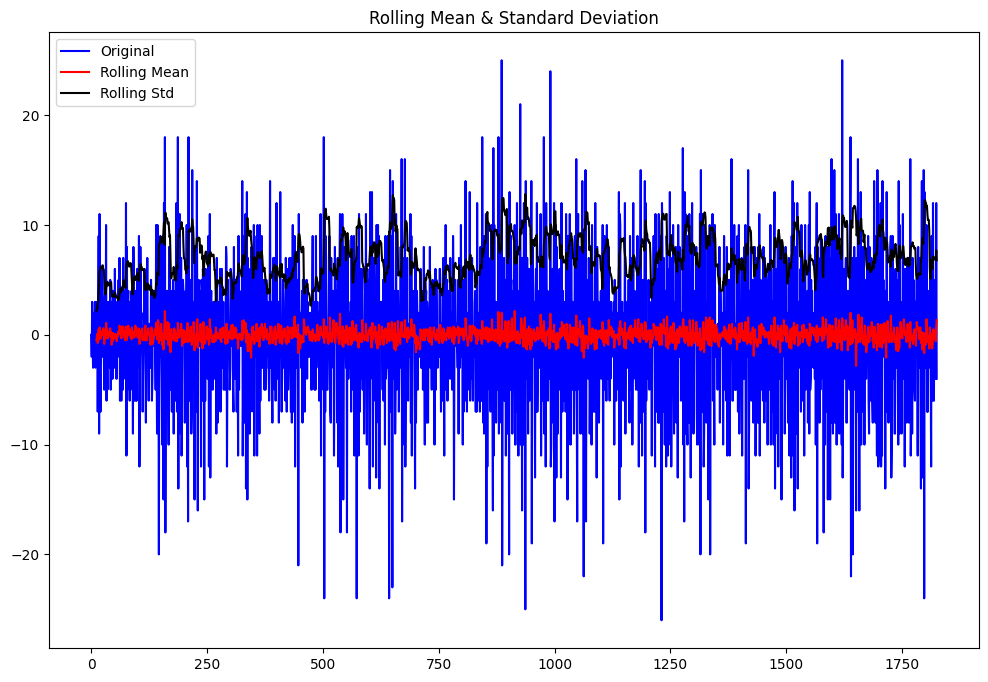

In [12]:
# differencing the data
diff = sample[:10000].diff(1).fillna(0)
test_stationarity(diff)

In the above plot, the rolling mean and standard deviation are more stable now.

In [13]:
# Perform Dickey-Fuller test on differenced series:

print('Results of Dickey-Fuller Test:')
dftest = adfuller(diff)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
pvalue = dftest[1]
if pvalue < 0.01:
    print('p-value = %.4f. The series is likely stationary.' % pvalue)
else:
    print('p-value = %.4f. The series is likely non-stationary.' % pvalue)

print(dfoutput)

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.266731e+01
p-value                        1.266588e-23
#Lags Used                     2.200000e+01
Number of Observations Used    1.803000e+03
Critical Value (1%)           -3.433982e+00
Critical Value (5%)           -2.863144e+00
Critical Value (10%)          -2.567624e+00
dtype: float64


ADF test shows the series is stationary after differencing. Let's check KPSS test for further confirmation.

In [14]:
# Perform KPSS test on differenced series:

result = kpss(diff)
print(result)
print('KPSS Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[3]['5%'])
print('p-value: %.2f' % result[1])

(0.03330806288619134, 0.1, 90, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS Test Statistic: 0.03
5% Critical Value: 0.46
p-value: 0.10


<ipython-input-14-86ecbbcf3d40>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(diff)


As we can see, the p-value is greater than 0.05. We fail to reject the null hypothesis and conclude that the time **series is stationary**.

So now, both the tests shows that the differenced series is stationary.

### Autoregression Intuition

Consider a time series that was generated by an autoregression (AR) process with a lag of k.

We know that the ACF describes the autocorrelation between an observation and another observation at a prior time step that includes direct and indirect dependence information.

This means we would expect the ACF for the AR(k) time series to be strong to a lag of k and the inertia of that relationship would carry on to subsequent lag values, trailing off at some point as the effect was weakened.

We know that the PACF only describes the direct relationship between an observation and its lag. This would suggest that there would be no correlation for lag values beyond k.

This is exactly the expectation of the ACF and PACF plots for an AR(k) process.

### Moving Average Intuition

Consider a time series that was generated by a moving average (MA) process with a lag of k.

Remember that the moving average process is an autoregression model of the time series of residual errors from prior predictions. Another way to think about the moving average model is that it corrects future forecasts based on errors made in recent forecasts.

We would expect the ACF for the MA(k) process to show a strong correlation with recent values up to the lag of k, then a sharp decline to low or no correlation. By definition, this is how the process was generated.

For the PACF, we would expect the plot to show a strong relationship to the lag and a trailing off of correlation from the lag onwards.

Again, this is exactly the expectation of the ACF and PACF plots for an MA(k) process.

**Summary:**
From the autocorrelation plot we can tell whether or not we need to add MA terms. From the partial autocorrelation plot, we know we need to add AR terms.

References:
https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/

### How to interpret ACF and PACF plots

For time series models such as Auto Regression (AR), Moving Averages (MA), or their combinations (ARMA), we need to specify one or more parameters (eg. p, q). These can be obtained by looking at ACF (to infer q parameter) and PACF (to infer p parameter) plots.

In a nutshell:

* If the ACF plot declines gradually and the PACF drops instantly, use Auto Regressive model
* If the ACF plot drops instantly and the PACF declines gradually, use Moving Average model
* If both ACF and PACF decline gradually, combine Auto Regressive and Moving Average models (ARMA).

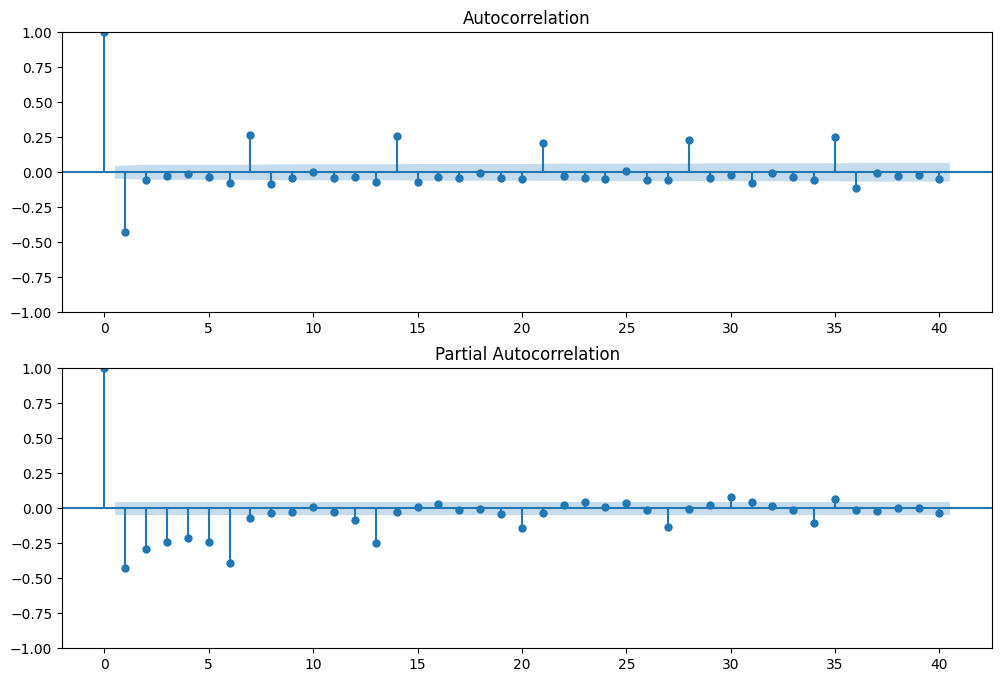

In [15]:
# Visualize ACF and PACF plots
diff = sample[:10000].diff(1).fillna(0)
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diff, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(diff, lags=40, ax=ax2)

Create and fit the ARIMA model:

To know more about ARIMA click [here](https://www.statsmodels.org/devel/generated/statsmodels.tsa.arima.model.ARIMA.html)

In [16]:
arima_mod6 = sm.tsa.ARIMA(sample[:10000], order=(8,1,1)).fit(start_params=None)

In [17]:
arima_mod6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                 1826
Model:                 ARIMA(8, 1, 1)   Log Likelihood               -5572.990
Date:                Sat, 08 Mar 2025   AIC                          11165.980
Time:                        09:19:41   BIC                          11221.073
Sample:                             0   HQIC                         11186.303
                               - 1826                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0448      0.037      1.195      0.232      -0.029       0.118
ar.L2         -0.0598      0.034     -1.755      0.079      -0.127       0.007
ar.L3         -0.0666      0.034     -1.952      0.051      -0.133       0.000
ar.L4         -0.0488      0.034     -1.424      0.154      -0.116       0.018
ar.L5         -0.0317      0.033     -0.951      0.341      -0.097       0.034
ar.L6          0.0198      0.032      0.628      0.530      -0.042       0.082
ar.L7          0.2757      0.029      9.540      0.000       0.219       0.332
ar.L8         -0.0002      0.025     -0.008      0.994      -0.049       0.049
ma.L1         -0.9143      0.028    -32.679      0.000      -0.969      -0.859
sigma2        26.2635      0.813     32.285      0.000      24.669      27.858
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.76
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.41   Skew:                             0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The summary attribute that results from the output of ARIMA returns a significant amount of information,

* The coef column shows the weight (i.e. importance) of each feature and how each one impacts the time series.
* The P>|z| column informs us of the significance of each feature weight. Here, each weight has a p-value lower or close to 0.05, so it is reasonable to retain all of them in our model.

Reading ACF and PACF plots is however still challenging, and using grid search to find optimal parameter values is sometimes useful. From grid search, we can obtain an optimal parameter combination that has the lowest error (such as MAPE) or lowest general quality estimator (such as AIC).


### Identifying optimal parameters using `auto_arima`

pmdarima‘s `auto_arima` function is extremely useful when building an ARIMA model as it helps us identify the most optimal p,d,q parameters and return a fitted ARIMA model.

**Using pmdarima for Auto ARIMA model:**

In the previous method, checking for stationarity, making data stationary if necessary, and determining the values of p and q using the ACF/PACF plots can be time-consuming and less efficient. Using pmdarima’s auto_arima() function makes this task easier for us by eliminating steps for implementing an ARIMA model.


#### auto_arima

The auto-ARIMA process seeks to identify the most optimal parameters for an ARIMA model, settling on a single fitted ARIMA model.

Auto-ARIMA works by conducting differencing tests (i.e., Kwiatkowski–Phillips–Schmidt–Shin, Augmented Dickey-Fuller or Phillips–Perron) to determine the order of differencing, d, and then fitting models within ranges of defined start_p, max_p, start_q, max_q ranges. If the seasonal optional is enabled, auto-ARIMA also seeks to identify the optimal P and Q hyper- parameters after conducting the Canova-Hansen to determine the optimal order of seasonal differencing, D.

In order to find the best model, auto-ARIMA optimizes for a given information_criterion, one of (‘aic’, ‘aicc’, ‘bic’, ‘hqic’, ‘oob’) (Akaike Information Criterion, Corrected Akaike Information Criterion, Bayesian Information Criterion, Hannan-Quinn Information Criterion, or “out of bag”–for validation scoring–respectively) and returns the ARIMA which minimizes the value.

**Note:** pmdarima may take a long time to find the terms for the dataset, subset of datapoints are used to minimize the execution time, however, we can experiment with a subset of the dataset.


From the ACF and PACF plot, we can observe that data is exhibiting same pattern for each 7 lags. (seasonal term 'm' = 7)

In [18]:
# Fit the model
model = pm.auto_arima(sample[:1000], seasonal=True, m=7) # m is seasonal term

# Make forecast
forecasts = model.predict()  # predict 1 step into the future

In [19]:
# Model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1000
Model:             SARIMAX(0, 1, 3)x(1, 0, [1], 7)   Log Likelihood               -2932.539
Date:                             Sat, 08 Mar 2025   AIC                           5879.077
Time:                                     09:21:18   BIC                           5913.424
Sample:                                          0   HQIC                          5892.132
                                            - 1000                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.281e-05      0.001      0.063      0.949      -0.002       0.002
ma.L1         -0.8898      0.031    -28.889      0.000      -0.950      -0.829
ma.L2         -0.0396      0.044     -0.902      0.367      -0.126       0.046
ma.L3          0.0340      0.031      1.097      0.273      -0.027       0.095
ar.S.L7        0.9894      0.007    148.405      0.000       0.976       1.002
ma.S.L7       -0.9280      0.020    -47.189      0.000      -0.967      -0.889
sigma2        20.4076      0.852     23.953      0.000      18.738      22.077
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 9.32
Prob(Q):                              0.95   Prob(JB):                         0.01
Heteroskedasticity (H):               1.33   Skew:                             0.07
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Please answer the questions below to complete the experiment:




In [20]:
#@title Time-series analysis is based on the assumption that { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "past patterns in the variable to be forecast will continue unchanged into the future." #@param ["", "random error terms are normally distributed.", "past patterns in the variable to be forecast will continue unchanged into the future.", "the data do not exhibit a trend."]

In [21]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [22]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "Some operations are same as previous assignment" #@param {type:"string"}


In [23]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [24]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [25]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Somewhat Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [26]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 8868
Date of submission:  08 Mar 2025
Time of submission:  14:54:27
View your submissions: https://cds-iisc.talentsprint.com/notebook_submissions
